Soft deadline for this HW -- 28 September, 22:00. Hard deadline -- 30 September, 22:00

Please attach your work at https://docs.google.com/forms/d/e/1FAIpQLScfkQPm_MKvMOhL7Mpz316XOIuYvLEX0MOLuo0mwP27fi5EYA/viewform

### Option pricing

Here you should write a couple of functions for pricing 
- options of different types (European, American, Barrier) with
- different approaches (analytical, numerical schemes and MC simulations)

Implement everything as different functions (or write classes if you want) with different parameters, then compare results (where possible), plot convergence etc.

##### Note that only tasks 0, 2, 3, 7, 8 are required, other tasks are optional 

Analytical formulas:
0. Implement analytical Black-Scholes formulas
1. (*Optional*) Modify Black-Scholes formulas for dividends paying stocks

Numerical schemes:
2. Implement Binomial pricing model
3. Modify program to price American option
4. (*Optional*) Implement Trinomial pricing model
5. (*Optional*) Implement Explicit Finite Difference pricing model
6. (*Optional*) Modify program to price Down-and-out (or any other barrier) put option

Monte Carlo methods:
7. Implement Monte Carlo simulation scheme for option pricing
8. Modify program to price One-touch (or any other path-dependent option type) option
9. (*Optional*) Modify program to price Geometric Weekly Asian Put option (or any other strong path-dependent option type) on a Basket of two stocks

##### Hint 1: This book could be very useful since it has all explanations and even pices of code -- *The Complete Guide To Option Pricing Formulas. Espen G. Haug*

##### Hint 2: You will have to make a very small modification to your Binomial tree model to price an American option 

##### Hint 3: You will have to make a very small modification to your MC method to price One-touch option (https://www.investopedia.com/terms/o/onetouchoption.asp)

In [ ]:
import numpy as np
import scipy.stats

In [26]:
# for the 0 task you can use this function to calculate CDF of a Normal distribution

scipy.stats.norm.cdf(0)

0.5

In [ ]:
# and these for Monte carlo methods 

print(np.linspace(0, 1, 8))
print(np.random.normal(size=8))

In [24]:
# templates for tasks 0, 2, 7

def euro_vanilla_analytical(S, K, T, r, sigma, option='call'):
    
    result = S - K
        
    return result


def euro_vanilla_binomial(S, K, T, r, sigma, option='call', n_periods=10):
    
    return 0


def euro_vanilla_mc(S, K, T, r, sigma, option='call', n_periods=10, n_samples=10**3):
    
    return 0

In [25]:
S = 50
K = 100
T = 1
r = 0.05
sigma = 0.25

option = 'put'

euro_vanilla(S, K, T, r, sigma, option)

45.15029495944084

# Решение

## 0. Implement analytical Black-Scholes formulas

### Предположения модели ###
В моделе Блэка-Шульца предполагается, что на рынке есть безрисковый актив (Bond) и как минимум один актив с риском (Stock). (B, S)-рынок.

Предположения о рынке:

* **No arbitrage** (не существует стратегии, которая бы давала прибыль без риска принести убытки).
* Можно занимать поцию с **любым номиналом** по все доступным активам. Включаю отрицательные (long / short selling, borrow / lend) и дробные номиналы.
* **Frictionless market**. Принебрегаем стоимостью транзаций и Bid/Ask spread.


Активы ( B, S ):

* Risk-free rate: **r = const**.
* Движение рыночной цены S - **геометрическое броуновское движение** с постоянными параметрами drift и volatility.

* В классическом варианте по underlying активу нет начисления дивидентов. Но модель легко обобщается на случай актива с дивидентами. Это необходимо для, например, для FX options.


### Уровнение для цены опциона ###

$$ \frac{\partial C}{\partial t} + \frac{1}{2}\sigma^2 S^2 \frac{\partial^2 C}{\partial S^2} + rS\frac{\partial C}{\partial S} - rC = 0 $$
PDE


### Формула 
Формула Блэка-Шульца для Европейского call-опциона:  

$$ C(S, K, \tau, r, q, \sigma) = N( d_+ ) S e^{ -q \tau} - N( d_- ) K e^{ -r \tau } $$  

для put-опциона:

$$ P(S, K, \tau, r, q, \sigma) = K e^{-r \tau } N( -d_{-} ) - S_0 e^{ - q \tau } N( -d_{+} ) $$

где: 
$$ \tau = T - t $$
.

$$  d_{+} = \frac{ \log{ \frac{S}{K} } + (r-q + \frac{ \sigma^{2} }{2} \tau ) }{ \sigma \sqrt{ \tau }  } = d_{1}  $$    
и  

$$  d_{-} = d_{+} - \sigma  \sqrt{ \tau } = \frac{ \log{ \frac{S}{K} } + (r-q - \frac{ \sigma^{2} }{2} \tau ) }{ \sigma \sqrt{ \tau } } = d_{2} $$  

$N(z) = \Phi(z) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{z} e^{-\frac{ x^{2}}{2} } dx$ это функция распределения для стандартного нормального (гаусовского) распределения. 

Плотность распределения: $N'(z) = \phi(z) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{ x^{2}}{2}}$.



In [1]:
import numpy as np
import scipy as sp
from scipy import stats
import math as m

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def N(x):
    return stats.norm.cdf(x, 0.0, 1.0)

def bsm_d1(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q + 0.5 * sigma ** 2) * T) / (sigma * m.sqrt(T))

def bsm_d2(S, K, T, r, q, sigma):
    return (np.log(S / K) + (r - q - 0.5 * sigma ** 2) * T) / (sigma * m.sqrt(T))

def bsm_pv(isCall, S, K, T, r, q, sigma):
    d1 = bsm_d1(S, K, T, r, q, sigma)
    d2 = bsm_d2(S, K, T, r, q, sigma)
    if isCall:
        return S * N(d1) * m.exp(-q * T) - K * m.exp(-r * T) * N(d2)
    else:
        return K * N(-d2) * m.exp(-r * T)  - S * m.exp(-q * T) * N(-d1)

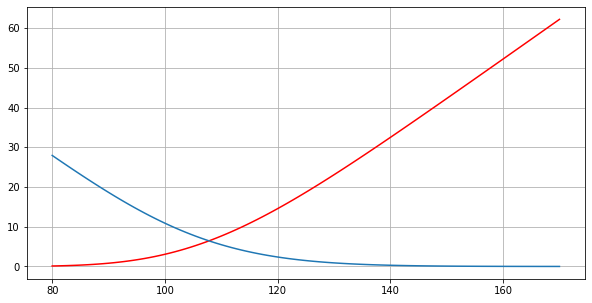

In [4]:
K = 110 # Strike price
r = 0.02 
sigma = 0.15
x = np.linspace(K-30, K+60, num=100)
#
f, ax = plt.subplots(figsize=(10,5))
ax.grid(True)
ax.plot(x, bsm_pv(isCall=True, S=x, K=K, T=1, r=r, q=0, sigma=sigma), color="red") # Call option
ax.plot(x, bsm_pv(isCall=False, S=x, K=K, T=1, r=r, q=0, sigma=sigma))



# 2. Implement Binomial pricing model

## Решение

![title](formula.png)

$0 < d < e^{r \Delta t} < u$

$u = e^{ \sigma \sqrt{ \Delta t } }$

$d = \frac{1}{u}$

$p = \frac{e^{r \Delta t} - d}{u - d}$ - вероятность движения вверх на каждом шаге

In [26]:
# based on idea from http://www.theresearchkitchen.com/archives/738

def gen_lattice(S0, u, d, N):
    """generates a binomial lattice
    
    for a given up, down, start value and number of steps (N).
    Resulting lattice has N+1 levels.
    """
    S = [float(S0)]

    for i in range(1, N+1):
        for j in range(0, i+1):
            S.append( S0 * d**j * u**(i-j) )

    return S

gen_lattice(S0=100., N=3, u=1.1, d=1./1.1)

[100.0,
 110.00000000000001,
 90.9090909090909,
 121.00000000000001,
 100.0,
 82.64462809917354,
 133.10000000000005,
 110.00000000000001,
 90.9090909090909,
 75.13148009015777]

## Примеры работы с сетью

The number of levels in a binomial lattice of length N is $\frac{\sqrt{8N+1}-1}{2}$

In [27]:
def lattice_levels(S):
    return int( round( (m.sqrt(8*len(S)+1)-1)/2 ) )

S = gen_lattice(S0=100., N=5, u=1.1, d=1/1.1)
######

''' Обрабатываем последний слой'''
L = lattice_levels(S)
print("levels: %d len: %d; number of first node on the last level: %d" % (L, len(S), len(S)-L))
print('------')
for i in range(len(S)-L, len(S) ):
    print(S[i])
    # S[i] = max()
print( '------\n\n')

''' Ходим по ячейкам'''
k=len(S)-L-1 # last index before the last level starts
for i in reversed(range(1, L)):
    for j in range(0, i):
        print("%f connected to %f and %f" % (S[k], S[k+i], S[k+i+1]))
        k = k - 1
    print('---')

levels: 6 len: 21; number of first node on the last level: 15
------
161.05100000000004
133.10000000000002
110.00000000000003
90.9090909090909
75.13148009015777
62.092132305915506
------


68.301346 connected to 75.131480 and 62.092132
82.644628 connected to 90.909091 and 75.131480
100.000000 connected to 110.000000 and 90.909091
121.000000 connected to 133.100000 and 110.000000
146.410000 connected to 161.051000 and 133.100000
---
75.131480 connected to 82.644628 and 68.301346
90.909091 connected to 100.000000 and 82.644628
110.000000 connected to 121.000000 and 100.000000
133.100000 connected to 146.410000 and 121.000000
---
82.644628 connected to 90.909091 and 75.131480
100.000000 connected to 110.000000 and 90.909091
121.000000 connected to 133.100000 and 110.000000
---
90.909091 connected to 100.000000 and 82.644628
110.000000 connected to 121.000000 and 100.000000
---
100.000000 connected to 110.000000 and 90.909091
---


In [28]:
import enum
class CallPut(enum.Enum):
    call = 1
    put = 2

class ExerciseStyle(enum.Enum):
    euro = 1
    amer = 2

In [35]:
def pv_crr(amerEuro, callPut, S0, K, T, r, sigma, N):
    dt = T / N
    df = m.exp(-r * dt)

    u = m.exp(sigma * m.sqrt(dt))
    d = 1 / u
    p = ( m.exp(r * dt) - d ) / (u - d)

    S = gen_lattice(S0=S0, N=N, u=u, d=d)
    L = N+1 #lattice_levels(S)
    
    payoff = lambda x: max( 0, x - K ) if CallPut.call == callPut else max( 0, K - x)

    # Calculate payoff at the last lattice level
    L = lattice_levels(S)
   
    # find initial S0
    for i in range(len(S)-L, len(S) ):
        S[i] = payoff(S[i]) 
        
   
    
    k=len(S)-L-1 # last index before the last level starts
    for i in reversed(range(1, L)):
        for j in range(0, i):
            if amerEuro == ExerciseStyle.euro:
                S[k] = df * (p * S[k+i] + (1 - p) * S[k+i+1])
            else:
                S[k] = max(p * S[k+i] + (1 - p) * S[k+i+1], payoff(S[k]))
            k = k - 1
    
    return S[0], S

# parameters
S0 = 100.
T = 1.
r = 0.05
sigma = 0.20
K = 100.
N = 1000

es = ExerciseStyle.euro
print("Euro call and put")
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )
print("------")
print("American call and put")
es = ExerciseStyle.amer
pvC, _ = pv_crr(es, CallPut.call, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvC )
pvP, _ = pv_crr(es, CallPut.put, S0=S0, K=K, T=T, r=r, sigma=sigma, N=N)
print( pvP )

Euro call and put
10.448584103764572
5.571526553833685
------
American call and put
10.984294466342126
6.263460107678445


# Метод Монте-Карло
Опционы 
- контракты, по которым покупатель получает право на покупку (продажу) базового актива по заранее оговоренной цене в определенный договором момент.

Типы опционов
--Европейский опцион - можно реализовать только в оговоренный момент времени.
--Американский опцион - покупатель может провести сделку в любой день до истечения контракта. 

Метод Монте Карло.
Заключается в оценке матема­тического ожидания выплаты, ко­торую сгенерирует опцион для его владельца, путем многократного генерирования возможных ценовых путей движения акции. 

Оценка опциона методом Монте Карло выглядит следующим обра­зом: 
необходимо рассчитать, какую выплату (payoff) в сред­нем сгенерирует опцион в дату истечения. 

1)Генерирование случайной будущей цены акции на дату истечения опциона, с использованием безрисковой ставки в качестве ожидаемой доходности акции

2)Расчет выплаты по опциону при данной цене акции. Шаги 1 и 2 образуют одну итерацию. Результатом итерации является значение интересующей нас случайной величины

3) шаги 1 и 2 повторяются много раз

4) рассчитывается среднее значение выплаты по опциону (мат ожидание)

5) среднее значение дисконтируется (умножается на дискаунт фактор) по безрисковой ставке, а результат - это оценка стоимости опциона.

In [37]:
from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math as m
from time import time
from scipy import stats

In [38]:
S0 = 80.; # Цена базового актива в начальный момент времени 
K = 85.;  # Страйк - за сколько денег договорились покупать/продавать активы
T = 1.0;  # Время
r = 0.05; # Процентная ставка
sigma = 0.2 # некий параметр процесса, который считаем известным


In [39]:
''' 
    Берем то, что сгенерировал numpy и нормируем,
'''
def standard_normal(I): 
    z = np.random.standard_normal(I)
    mean = np.mean(z)
    std = np.std(z) # стандартное отклонение
    return (z - mean)/std 


## Функция для расчета call/put Европейского и Барьерного опционов

$ C_0 = E\left[ e^{-rT} max(0, S_T - K) \right] $

$S(t) = S(t-\Delta t) \exp(r t - \frac{1}{2} \sigma^2 t + \sigma W_t )$



In [42]:
# Parameters
M = 360; I = 10000

def option_pricing_with_paths(S0, K, T, r, sigma, M, I, OptionType = "euro", ActionType = "call"):
    # Simulating I paths with M time steps
    S = np.zeros((M + 1, I))
    S[0] = S0
    B = S[0][0] * 1.4 # барьер
    dt = float(T) / M
    for t in range(1, M + 1):
        z = standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * m.sqrt(dt) * z)
        if OptionType == "barrier":
            for id in range(len(S[t])):
                if S[t][id] > B: # если превысил барьер, то прекратил действие
                    S[t][id] = 0
    # PV is extected discounted payoff
    if ActionType == "call" and OptionType == "euro":
        C = np.sum(m.exp(-r * T) * np.maximum(S[-1] - K, 0)) / I
        return C, S
    elif ActionType == "call" and OptionType == "barrier":
        C_bar = 0
        for id in range(len(S[-1])):
            if S[-1][id] != 0:
                C_bar += m.exp(-r * T) * np.maximum(S[-1][id] - K, 0) / I
        return C_bar, S
    elif ActionType == "put" and OptionType == "euro":
        '''
            Putt-Call Parity:
                              C - Put = S - exp{-rt} * K
        '''
        
        Put = np.sum(m.exp(-r * T) * np.maximum(K - S[-1], 0)) / I
        return Put, S
    elif ActionType == "put" and OptionType == "barrier":
        P_bar = 0
        for id in range(len(S[-1])):
            if S[-1][id] != 0:
                P_bar += m.exp(-r * T) * np.maximum(K - S[-1][id], 0) / I
              
        return P_bar, S

In [47]:
print("Euro Put")
np.random.seed(1)
t0 = time()
C, SPaths = option_pricing_with_paths(S0, K, T, r, sigma, M, I, "euro", "put")
calcTime = time() - t0

print( "PV: %.5f" % C)
print( "Calculation time   %.5f" % calcTime )

print("\nEuro Call")
np.random.seed(1)
t0 = time()
C, SPaths = option_pricing_with_paths(S0, K, T, r, sigma, M, I, "euro", "call")
calcTime = time() - t0

print( "PV: %.5f" % C )
print( "Calculation time   %.5f" % calcTime )



Euro Put
PV: 6.80426
Calculation time   0.19344

Euro Call
PV: 5.91828
Calculation time   0.17949


Text(0, 0.5, 'Spot')

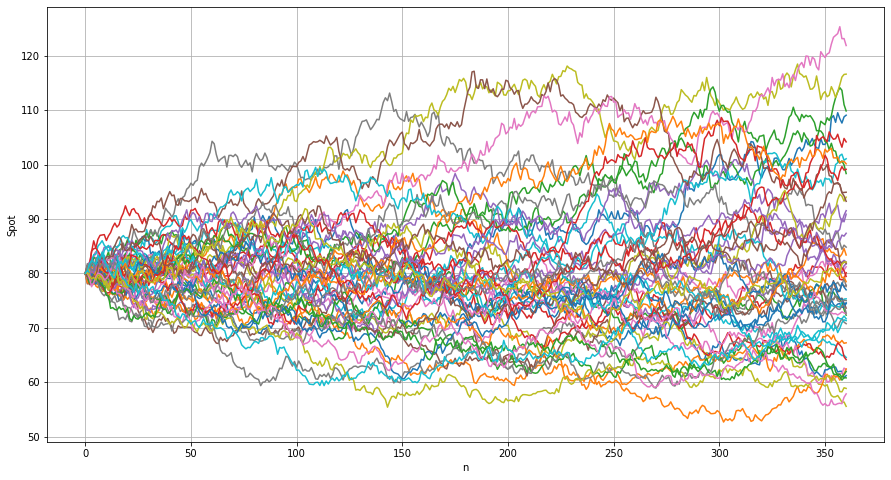

In [48]:
plt.figure(figsize=(15,8))
plt.plot(SPaths[:, :50])
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')

In [44]:
print("Barrier Put")
np.random.seed(1)
t0 = time()
C, SPaths = option_pricing_with_paths(S0, K, T, r, sigma, M, I, "barrier", "put")
calcTime = time() - t0

print( "PV: %.5f" % C )
print( "Calculation time   %.5f" % calcTime )

Barrier Put
PV: 6.79886
Calculation time   1.07447


In [45]:
print("Barrier call")
np.random.seed(1)
t0 = time()
C, SPaths = option_pricing_with_paths(S0, K, T, r, sigma, M, I, "barrier", "call")
calcTime = time() - t0

print( "PV: %.5f" % C)
print( "Calculation time   %.5f" % calcTime )


Barrier call
PV: 2.90320
Calculation time   1.02400


Text(0, 0.5, 'Spot')

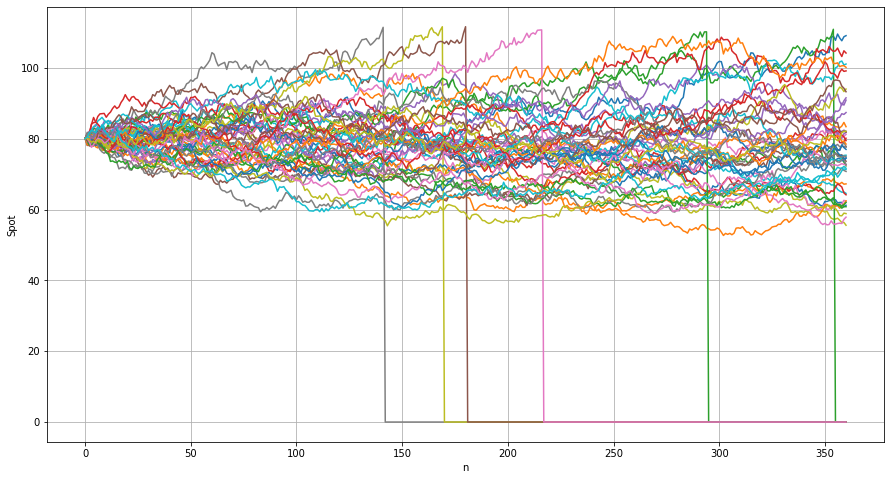

In [46]:
plt.figure(figsize=(15,8))
plt.plot(SPaths[:, :50])
plt.grid(True)
plt.xlabel('n')
plt.ylabel('Spot')